In [1]:
import zipfile
import shutil
import numpy as np
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_path = '_static/playback-thumbnail.png'

import librosa
import librosa.display

# We'll need IPython.display's Audio widget
from IPython.display import Audio

# We'll also use `mir_eval` to synthesize a signal for us
import mir_eval.sonify

import pandas as pd
import csv
import os
import json
import scipy



Selecionando as imagens com os 10 acordes mais frequentes na base de dados:

In [2]:
most_freq = np.array(['F:maj', 'G:maj', 'G#:maj', 'C#:maj', 'C:maj', 'E:maj', 'D#:maj',
       'D:maj', 'A#:maj', 'F#:maj'])

df = pd.read_csv('metadata_final.csv', sep = ',')
df_chords = df[df['most_freq'] == 1]


In [3]:
## paths

audio_fpath = 'processed_audio/'
audio_clips = df_chords['Filename']


In [37]:
df_chords['Acorde'].unique()

array(['G#:maj', 'C#:maj', 'D:maj', 'G:maj', 'E:maj', 'F#:maj', 'D#:maj',
       'A#:maj', 'F:maj', 'C:maj'], dtype=object)

In [6]:
show_filenames = []
# Recuperando um caso de cada acorde, para comparar os espectogramas
for i in most_freq:
    filename = df_chords.loc[df_chords['Acorde'] == i]['Filename'].iloc[0,]
    show_filenames.append(filename)

In [72]:
Audio(data=x, rate=sr)

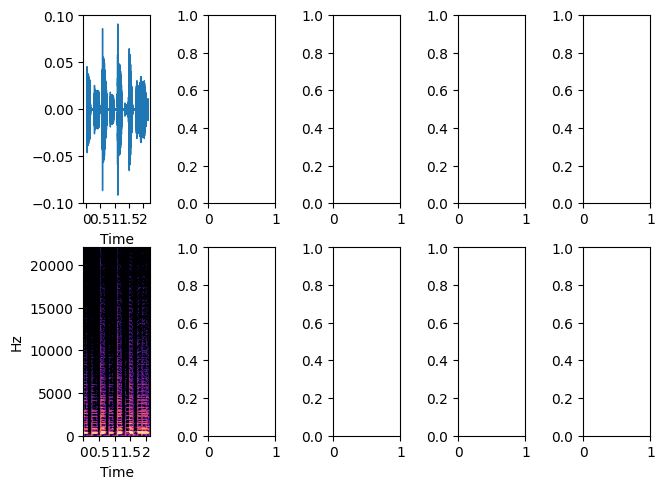

<Figure size 1400x700 with 0 Axes>

In [12]:
fig, ax = plt.subplots(2,5)
plt.figure(figsize=(14, 7))
fig.tight_layout()


x, sr = librosa.load(audio_fpath+j, sr=44100)
librosa.display.waveshow(x, sr=sr, ax = ax[0,0])
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))

#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', ax = ax[1,0])
# plt.colorbar()
# plt.show()

In [37]:
axes.clear()

AttributeError: 'numpy.ndarray' object has no attribute 'clear'

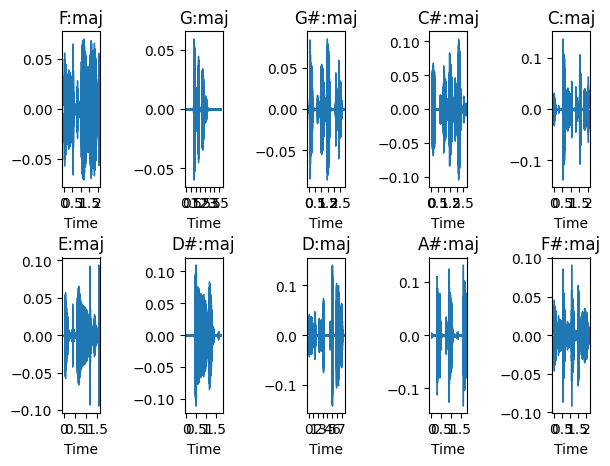

<Figure size 2000x1200 with 0 Axes>

In [39]:
fig, axes = plt.subplots(2,5)
plt.figure(figsize=(20, 12))
fig.tight_layout(pad = 2.5, h_pad = 3, w_pad= 3)

for j in range(len(show_filenames)):
        
    x, sr = librosa.load(audio_fpath+show_filenames[j], sr=44100)

    if j <= 4:
        librosa.display.waveshow(x, sr=sr, ax =  axes[0,j])
        X = librosa.stft(x)
        Xdb = librosa.amplitude_to_db(abs(X))
        axes[0,j].set(title= most_freq[j])
    
    else:
        librosa.display.waveshow(x, sr=sr, ax = axes[1,j-5])
        X = librosa.stft(x)
        Xdb = librosa.amplitude_to_db(abs(X))
        axes[1,j-5].set(title= most_freq[j])


    # X = librosa.stft(x)
    # Xdb = librosa.amplitude_to_db(abs(X))
    # plt.figure(figsize=(2, 2))
    # ax = librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    # plt.colorbar()
    # plt.show()

    # print(type(x), type(sr))
    # print(x.shape, sr)

#plt.show()

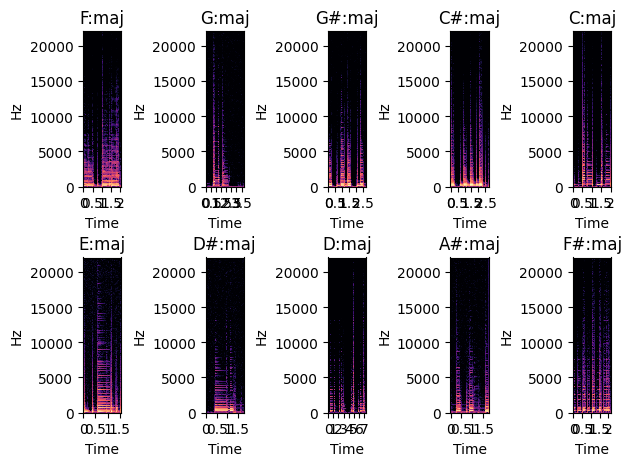

<Figure size 1400x700 with 0 Axes>

In [45]:
fig, axes = plt.subplots(2,5)
plt.figure(figsize=(14, 7))
fig.tight_layout(pad = 2.5, h_pad = 3, w_pad= 3)
images = []
for j in range(len(show_filenames)):
        
    x, sr = librosa.load(audio_fpath+show_filenames[j], sr=44100)

    if j <= 4:
        X = librosa.stft(x)
        Xdb = librosa.amplitude_to_db(abs(X))
        img = librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', ax =  axes[0,j])
        #plt.colorbar()
        axes[0,j].set(title= most_freq[j])
    
    else:
        X = librosa.stft(x)
        Xdb = librosa.amplitude_to_db(abs(X))
        img = librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', ax =  axes[1,j-5])
        #plt.colorbar()
        axes[1,j-5].set(title= most_freq[j])

    images.append(img)
    
    # plt.show()

    # print(type(x), type(sr))
    # print(x.shape, sr)


In [47]:
def plot_image_grid(images, ncols=None, cmap='gray'):
    '''Plot a grid of images'''
    if not ncols:
        factors = [i for i in range(1, len(images)+1) if len(images) % i == 0]
        ncols = factors[len(factors) // 2] if len(factors) else len(images) // 4 + 1
    nrows = int(len(images) / ncols) + int(len(images) % ncols)
    imgs = [images[i] if len(images) > i else None for i in range(nrows * ncols)]
    f, axes = plt.subplots(nrows, ncols, figsize=(3*ncols, 2*nrows))
    axes = axes.flatten()[:len(imgs)]
    for img, ax in zip(imgs, axes.flatten()): 
        if np.any(img):
            if len(img.shape) > 2 and img.shape[2] == 1:
                img = img.squeeze()
            ax.imshow(img, cmap=cmap)

# make 16 images with 60 height, 80 width, 3 color channels
#images = np.random.rand(16, 60, 80, 3)

# plot them
#plot_image_grid(images)

F:maj


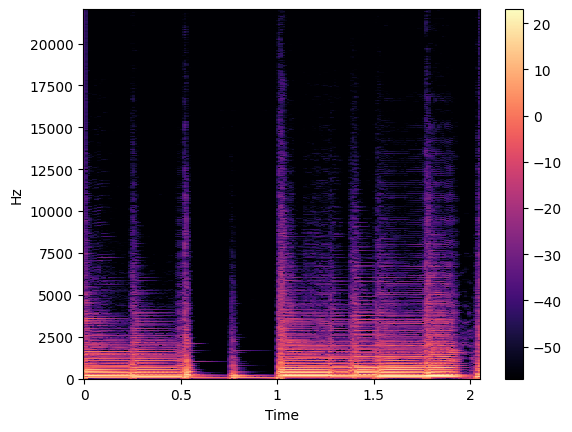

G:maj


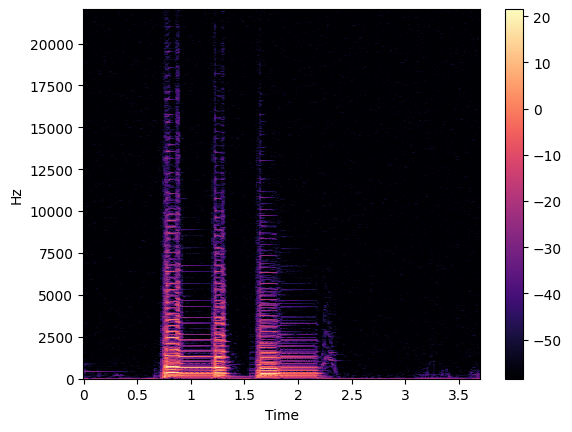

G#:maj


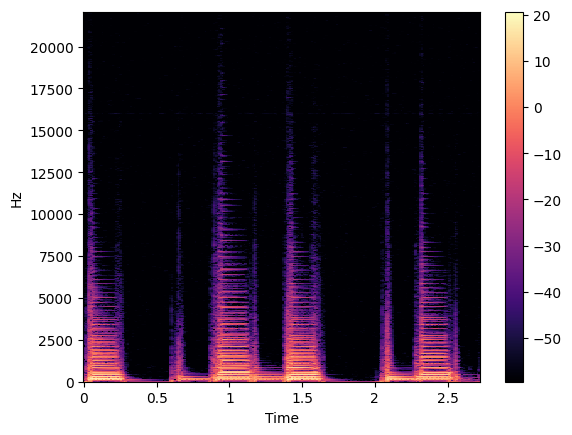

C#:maj


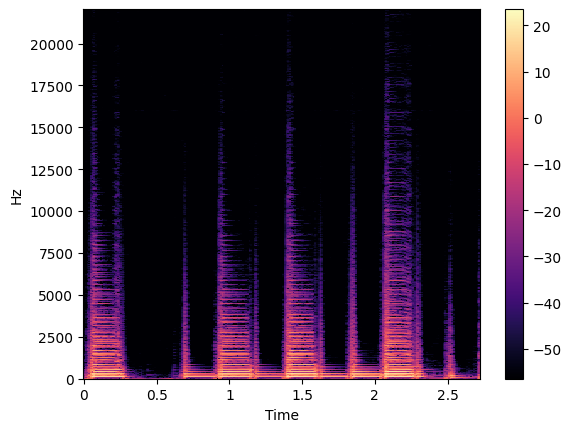

C:maj


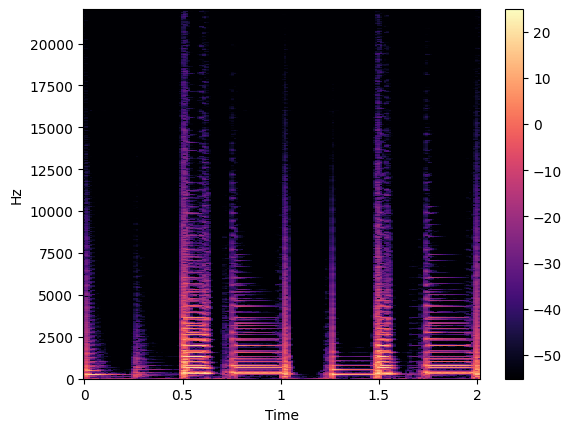

E:maj


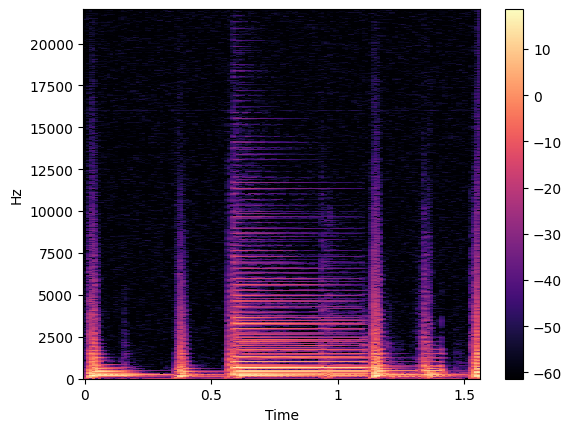

D#:maj


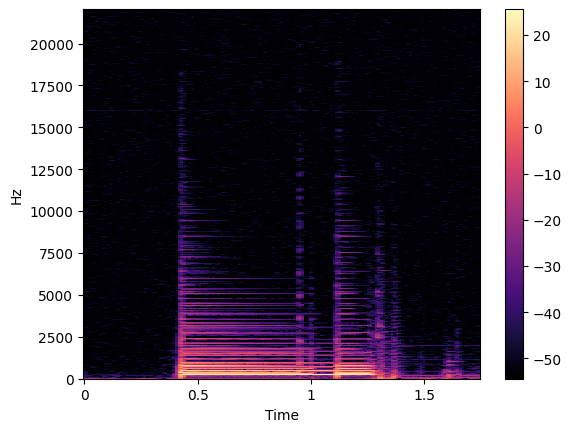

D:maj


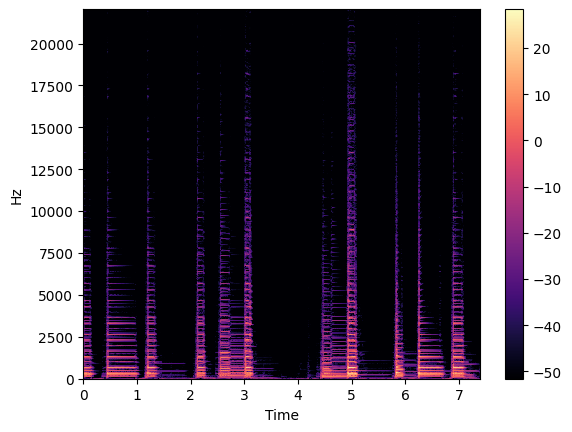

A#:maj


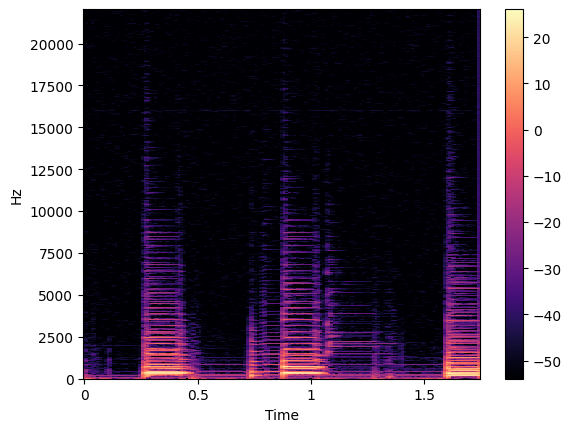

F#:maj


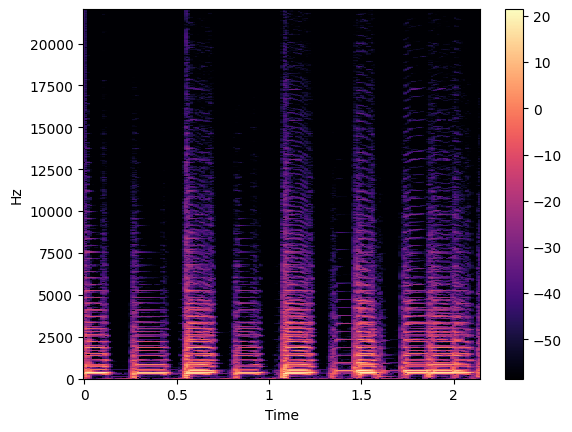

In [51]:
for j in range(len(show_filenames)):
    

    x, sr = librosa.load(audio_fpath+show_filenames[j], sr=44100)

    print(most_freq[j])
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()
    

F:maj


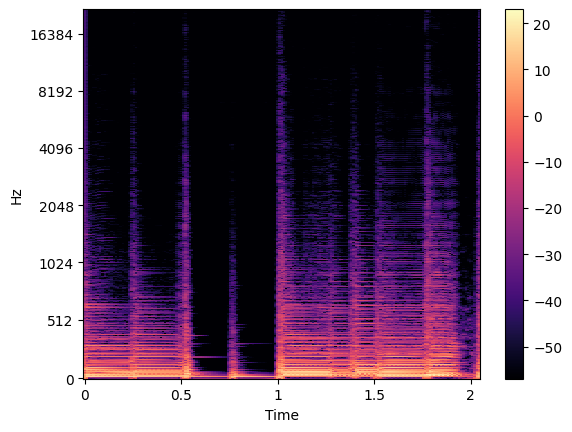

G:maj


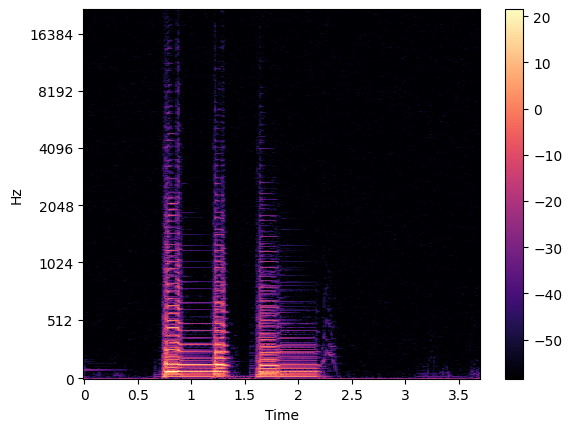

G#:maj


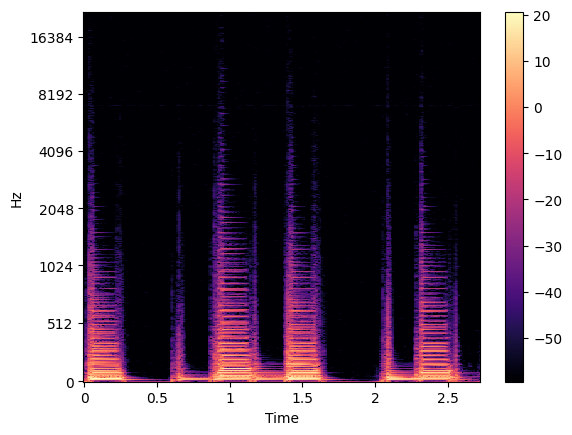

C#:maj


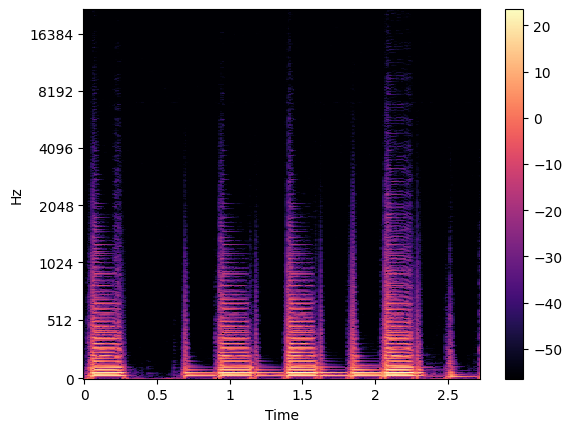

C:maj


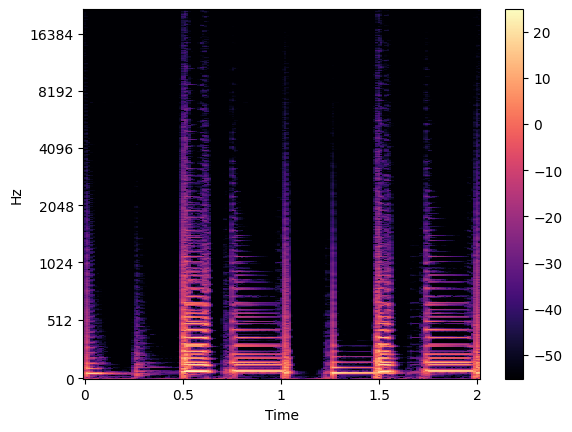

E:maj


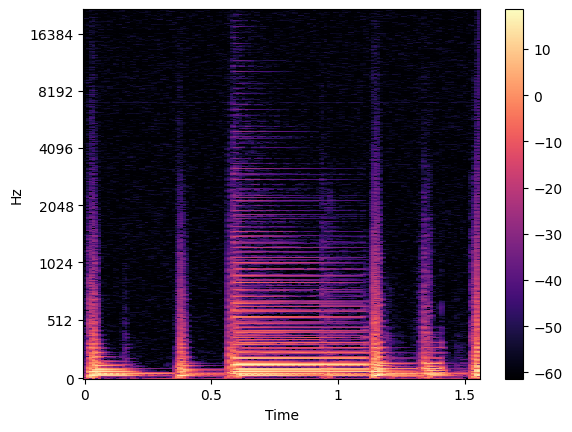

D#:maj


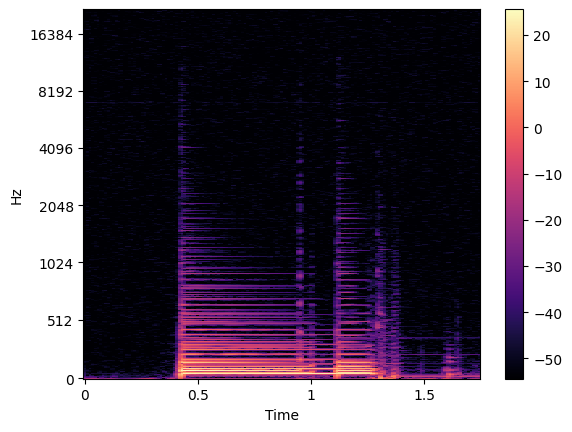

D:maj


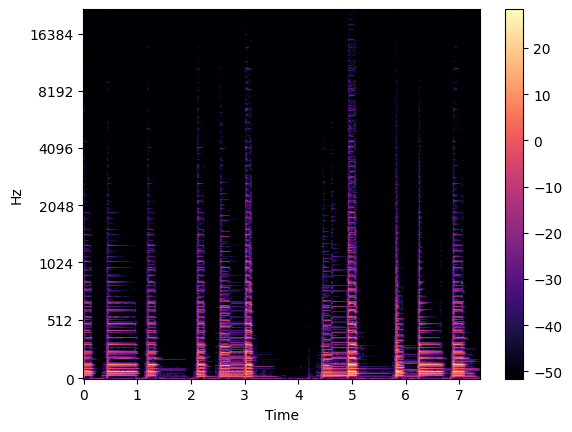

A#:maj


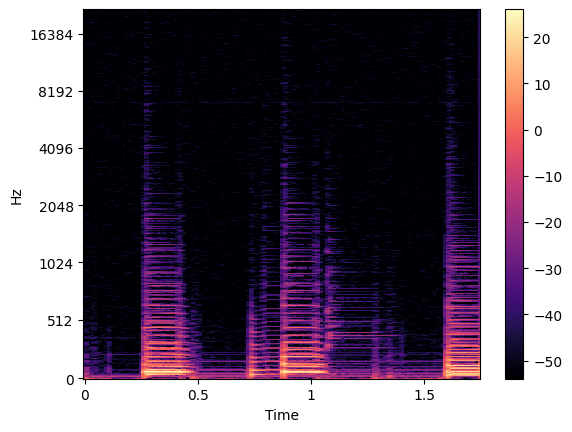

F#:maj


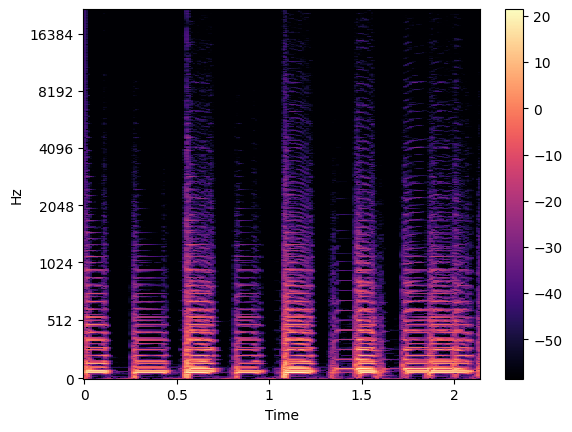

In [54]:
for j in range(len(show_filenames)):
    

    x, sr = librosa.load(audio_fpath+show_filenames[j], sr=44100)

    print(most_freq[j])
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.show()

In [53]:
# plt.figure(figsize=(14, 5))
# librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
# plt.savefig('teste.png')

# plt.colorbar()


In [31]:
spec = np.abs(librosa.stft(X, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)


mel_spect = librosa.feature.melspectrogram(y=X, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(spec, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

ParameterError: Audio data must be floating-point

In [3]:
def to_spectogram(audio_fpath, output, count = 500):
    audio_clips = os.listdir(audio_fpath)

    available = os.listdir('spectogram/')
    available  = [i.replace('.png', '.wav') for i in available]

    not_processed = [i for i in audio_clips if i not in available]

    iter = 0
    for i in not_processed:
        if iter == count:
            break

        x, sr = librosa.load(audio_fpath + i, sr=44100)
        X = librosa.stft(x)
        Xdb = librosa.amplitude_to_db(abs(X))
        librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
        plt.savefig( output +  i[:-3] + 'png', dpi = 96)
        iter +=1

        if iter%50 ==0:
            text = f'Total de:{ str(iter)}/{len(not_processed)} espectogramas gerados'
            print(text)
        

KeyboardInterrupt: 

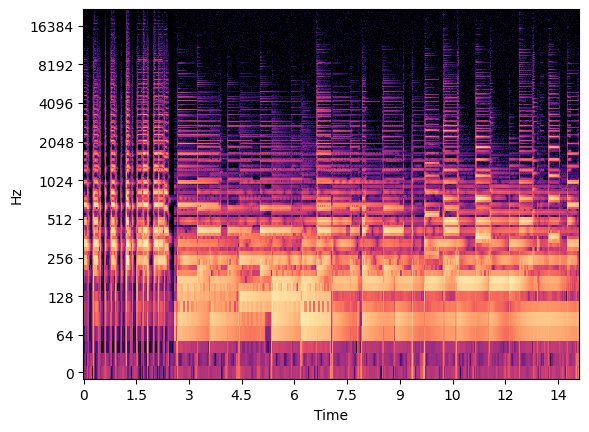

In [6]:
# 67 min - 126 imagens
to_spectogram(audio_fpath, output = 'spectogram/', count = 100)